# LinearAutoencoderDimensionalityReduction


## Imports



In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

In [2]:
data = pd.read_csv('anonymized_data.csv')

#### Data consists of 500 rows and 31 columns

In [3]:
data.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


## Scale the Data

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop('Label',axis=1))

# The Linear Autoencoder

#### Encoder
        h(x) = b + Wx
#### Decoder 
        x' = c + W'h(x)

We need the encoder part only as we are doing dimentionality reduction.

In [47]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [7]:
num_inputs = 30  # 3 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_outputs = num_inputs # Must be true for an autoencoder!
learning_rate = 0.01

### Shape of scaled_data

In [8]:
scaled_data.shape

(500, 30)

### Placeholder


In [9]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Layers

In [10]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

### Loss Function



In [11]:
loss = tf.reduce_mean(tf.square(outputs - X))  # MSE

### Optimizer

In [12]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize( loss)

### Initializing global variables


In [13]:
init = tf.global_variables_initializer()

## Running the Session


In [14]:
num_steps = 2000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X: scaled_data})

In [15]:
with tf.Session() as sess:
    sess.run(init)
        
    # Now ask for the hidden layer output (the 2 dimensional output)
    output_2d = hidden.eval(feed_dict={X: scaled_data})

### Shape of output_2d

In [16]:
output_2d.shape

(500, 2)

### Plotting the scatter plot

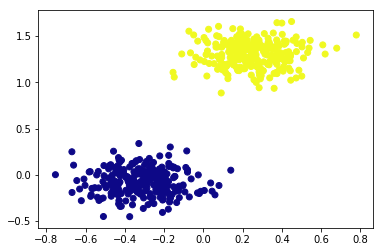

In [45]:

plt.scatter(output_2d[:,0],output_2d[:,1],c=data['Label'],cmap=pylab.cm.plasma)